In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers, models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.src.layers.activation.leaky_relu import LeakyReLU
from tensorflow.keras.layers import Input ,BatchNormalization,Flatten, Dense,Dropout
import numpy as np

In [ ]:



# Define the Mesonet-4 architecture
def mesonet4(input_shape):


    #//////////////////////////////////////////////
      x = Input(shape=input_shape)

      x1=layers.Conv2D(8 ,(3,3),padding='same', activation='relu')(x)
      x1=BatchNormalization()(x1)
      x1=layers.MaxPooling2D((2,2))(x1)

      x2=layers.Conv2D(filters=8 , kernel_size=(5,5),padding='same', activation='relu')(x1)
      x2=BatchNormalization()(x2)
      x2=layers.MaxPooling2D((2,2))(x2)

      x3=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x2)
      x3=BatchNormalization()(x3)
      x3=layers.MaxPooling2D((2,2))(x3)

      x4=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x3)
      x4=BatchNormalization()(x4)
      x4=layers.MaxPooling2D((2,2))(x4)

      y=Flatten()(x4)
      y=Dropout(0.5)(y)
      y=Dense(16)(y)
      y=LeakyReLU(alpha=0.1)(y)
      y=Dropout(0.5)(y)
      y=Dense(1,activation='sigmoid')(y)
    #//////////////////////////////////////////////////
      model = Model(inputs= x, outputs=y)
      return model



In [ ]:
# Create the Mesonet-4 model
input_shape = (128, 128, 3)  # Modify input shape based on your data
model = mesonet4(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1608      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 8)         32    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Data loading and preprocessing
# You should replace this with your dataset loading and preprocessing code
# Make sure to split your dataset into training and validation sets

# Example data loading using ImageDataGenerator
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

train_generator = train_data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/train_test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)






Found 7571 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'df': 0, 'real': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Training the model
model.fit(train_generator, epochs=25)

Epoch 1/25
237/237 [==============================] - 1106s 5s/step - loss: 0.6884 - accuracy: 0.6055
Epoch 2/25
237/237 [==============================] - 168s 707ms/step - loss: 0.5740 - accuracy: 0.7047
Epoch 3/25
237/237 [==============================] - 170s 716ms/step - loss: 0.5103 - accuracy: 0.7558
Epoch 4/25
237/237 [==============================] - 170s 718ms/step - loss: 0.4584 - accuracy: 0.7875
Epoch 5/25
237/237 [==============================] - 170s 716ms/step - loss: 0.4241 - accuracy: 0.8085
Epoch 6/25
237/237 [==============================] - 169s 713ms/step - loss: 0.3715 - accuracy: 0.8354
Epoch 7/25
237/237 [==============================] - 169s 710ms/step - loss: 0.3345 - accuracy: 0.8618
Epoch 8/25
237/237 [==============================] - 171s 719ms/step - loss: 0.3236 - accuracy: 0.8670
Epoch 9/25
237/237 [==============================] - 171s 721ms/step - loss: 0.2888 - accuracy: 0.8765
Epoch 10/25
237/237 [==============================] - 168s 708ms/

In [ ]:
model.save('my_trained_model_big.h5')


In [ ]:
model.save('my_trained_model_big.h5')


In [ ]:
loaded_model = keras.models.load_model('my_trained_model_big.h5')


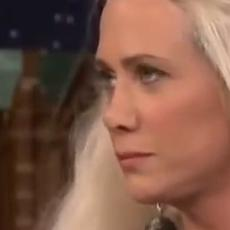

In [ ]:
image_path='/content/drive/MyDrive/Colab_Notebooks/deepfake_database/validation/real/47_516.jpg'
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread(image_path)

# Display the image (optional)
cv2_imshow( image)

In [ ]:
from tensorflow.keras.preprocessing import image

# Load an image from a file path
  # Replace with the actual file path
img = image.load_img(image_path, target_size=(128, 128))  # Adjust target_size as needed

# Preprocess the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image data if necessary

predictions = loaded_model.predict(img)
print(predictions)

class_labels = {0: "df", 1: "real"}



predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_class_label

1/1 [==============================] - 0s 43ms/step
[[0.87882525]]


'df'

1/1 [==============================] - 0s 23ms/step


array([[0.36179772]], dtype=float32)

In [ ]:
class_labels = {0: "df", 1: "real"}



predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_class_label

'df'

Validiation


In [25]:
validation_data_generator  = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Load the validation dataset using flow_from_directory
validation_generator = validation_data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/train_test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 0 images belonging to 2 classes.
